In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Consultoria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Consultoria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Leer datasets
df_train = pd.read_csv('train.txt', delimiter = ';', names = ['text', 'label'])
df_val = pd.read_csv('val.txt', delimiter = ';', names = ['text', 'label'])
df_test = pd.read_csv('test.txt', delimiter = ';', names = ['text', 'label'])

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(16000, 2)
(2000, 2)
(2000, 2)


In [3]:
#Juntar los tres datasets en uno solo por facilidad al entrenar y testear
df = pd.concat([df_train,df_val,df_test])
df.reset_index(inplace = True, drop = True)

print(df.shape) 
df.sample(5) 

(20000, 2)


,text,label
8669,im going at it with so much gusto i feel achin...,sadness
7106,i feel invigorated and enlivened and a bit mor...,joy
2389,i murakami but the first that i feel captures ...,joy
16001,i feel like i am still looking at a blank canv...,sadness
12632,i am jealous of andreas growing belly and the ...,anger


C:\Users\Consultoria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

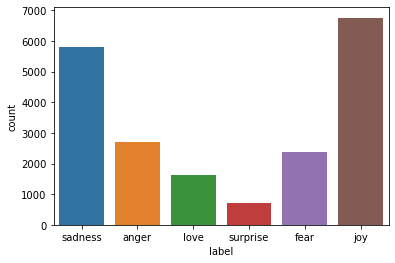

In [4]:
#Ver los tipos y cantidad de sentimientos
sns.countplot(df.label)

In [5]:
#Función para Transformar labels según el sentimiento 1 sentimiento bueno 0 malo
def manual_encoder(df):
    df.replace(to_replace = "surprise", value = 0, inplace = True)
    df.replace(to_replace = "love", value = 1, inplace = True)
    df.replace(to_replace = "joy", value = 2, inplace = True)
    df.replace(to_replace = "sadness", value = 3, inplace = True)
    df.replace(to_replace = "anger", value = 4, inplace = True)
    df.replace(to_replace = "fear", value = 5, inplace = True)

In [6]:
manual_encoder(df['label'])
df.sample(5)

,text,label
1108,i have one of the guest rooms in our current h...,3
12442,i feel amazing after every thrift trip i got o...,0
13695,i came out of the movie feeling like i had a b...,3
2608,i feel absolutely amazed at the unfolding stor...,0
17415,i was feeling somewhat shaky and i know that i...,5


In [7]:
#Lematizar (Transformar palabras en su base)
lm = WordNetLemmatizer()

In [8]:
#Función para transformar las palabras y deshacer stopwords (ej: a, the, to, etc.)
def data_prep(df):
    corpus = []
    for i in df:
        item = re.sub("[^A-Za-z]"," ",str(i))
        item = item.lower() 
        item = item.split()
        item = [lm.lemmatize(word) for word in item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in item))
    return corpus

In [9]:
data = data_prep(df['text'])
data[:5]

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy']

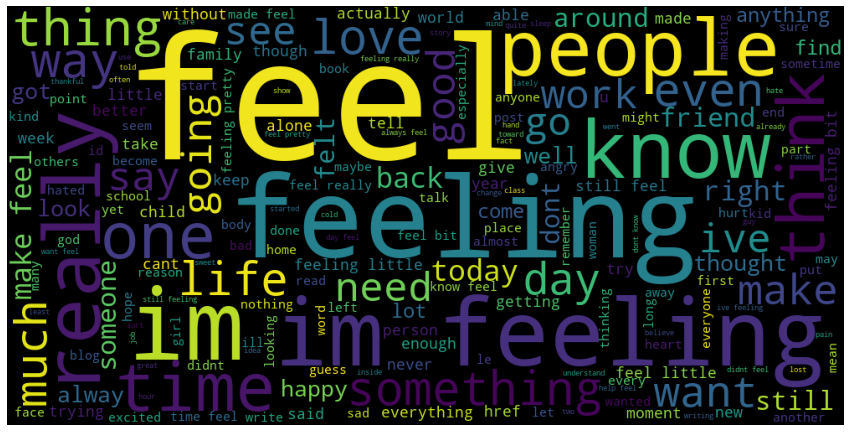

In [10]:
#WORDCLOUD
unique_string=(" ").join(data)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [11]:
#Tokenizar utilizando CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(data)
x = traindata
y = df['label']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [13]:
#Model
modelo = LogisticRegression()
modelo.fit(x_train, y_train)

C:\Users\Consultoria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
ypred = modelo.predict(x_test)

[[  80    0   15    6    0   27]
 [   0  263   67    6    2    3]
 [   3   47 1267   13    2    6]
 [   0    4   19 1122   23   11]
 [   0    0   19   37  474    7]
 [  11    4   29   30   20  383]]


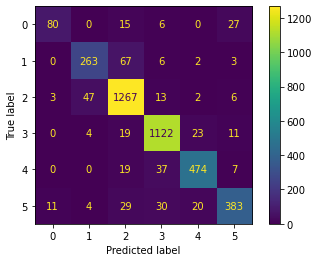

In [15]:
# Se puede visualizar la matriz de confusión
print(confusion_matrix(y_test, ypred))
plot_confusion_matrix(modelo, x_test, y_test)  
plt.show() 

In [16]:
#Resultados
print(classification_report(y_test, ypred))
print('\n Accuracy Score :', accuracy_score(y_test, ypred))
print('\n Precision Score :', precision_score(y_test, ypred,average='micro'))
print('\n Recall Score :', recall_score(y_test, ypred,average='micro'))
print('\n F1 Score :', f1_score(y_test, ypred,average='micro'))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72       128
           1       0.83      0.77      0.80       341
           2       0.89      0.95      0.92      1338
           3       0.92      0.95      0.94      1179
           4       0.91      0.88      0.90       537
           5       0.88      0.80      0.84       477

    accuracy                           0.90      4000
   macro avg       0.88      0.83      0.85      4000
weighted avg       0.90      0.90      0.90      4000


 Accuracy Score : 0.89725

 Precision Score : 0.89725

 Recall Score : 0.89725

 F1 Score : 0.8972499999999999


In [17]:
#Modelo 2 
# Creamos el objeto de arbol de decisión. Utilizamos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
# Entrenamos el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(x_train,y_train)

In [19]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(x_test)

In [20]:
# Se genera la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[ 105,    0,    3,    3,    0,   17],
       [   1,  284,   48,    3,    2,    3],
       [  12,   73, 1170,   50,   15,   18],
       [   3,   11,   26, 1055,   51,   33],
       [   0,    3,   14,   26,  484,   10],
       [  24,    2,   10,   18,   32,  391]], dtype=int64)

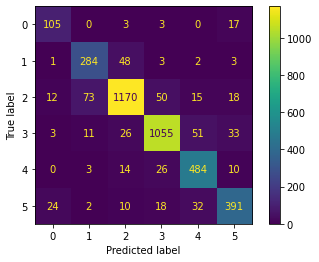

In [21]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, x_test, y_test)  
plt.show()  

In [22]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
print("Precisión: {}".format(precision_score(y_test,y_pred,average='micro')))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred,average='micro')))

Exactitud: 0.87
Recall: 0.87225
Precisión: 0.87225
Puntuación F1: 0.8722499999999999


In [23]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       128
           1       0.76      0.83      0.80       341
           2       0.92      0.87      0.90      1338
           3       0.91      0.89      0.90      1179
           4       0.83      0.90      0.86       537
           5       0.83      0.82      0.82       477

    accuracy                           0.87      4000
   macro avg       0.83      0.86      0.84      4000
weighted avg       0.88      0.87      0.87      4000



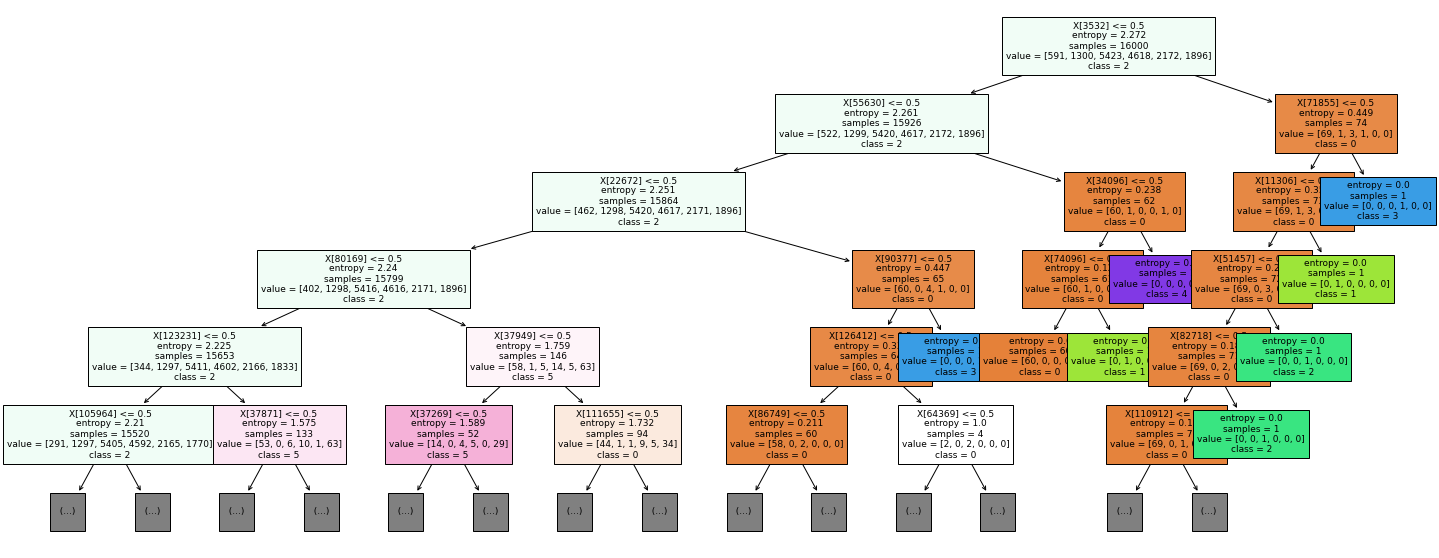

In [24]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=5, class_names=["0", "1","2","3","4","5"], filled=True, fontsize=9)

In [25]:
fig.savefig("decistion_tree.png")